# Dye reabsorption

Dye reabsorbs the emitted light and this is taken into account as follows

**Author: Jean Matias \
Dye Sample: s017 (data provided by Dyomics)\
Analysed on: 2022/03/02**


In [23]:
%matplotlib notebook
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np

In [24]:
path = '../data/equipment-calibration/dye-reabsorption/'
fileName = 'dy781_ethanol.csv'

data = pd.read_csv(path + fileName)
mu785 = 0.42 # (obtained QY system and calculated at the APD callibration notebook)

In [25]:
data

,wavelength,absorbance,emission
0,250,0.049777,NaN
1,251,0.049542,NaN
2,252,0.049346,NaN
3,253,0.049437,NaN
4,254,0.049388,NaN
...,...,...,...
646,896,-0.002095,-17.8738
647,897,-0.002104,-17.8802
648,898,-0.002053,-17.8923
649,899,-0.002081,-17.9198


In [26]:
# background subtraction
data['absorbance_norm'] = data.absorbance - data.absorbance.min()
data['emission_norm'] = data.emission - data.emission.min()
# stokes shift for laser 785
data.loc[data['wavelength'] < 785, 'emission_norm'] = 0

# norm
data['absorbance_norm'] = data.absorbance_norm / data.absorbance_norm.sum()
data['emission_norm'] = data.emission_norm / data.emission_norm.sum()
data['emission_norm'] = data['emission_norm'].fillna(0)

# Luminescence equation compensated

$L_d = \sum_{\lambda} L_d^{'} e^{\mu_\lambda / 2}$


In [27]:
data[(data['wavelength'] > 782) & (data['wavelength'] < 788)]

,wavelength,absorbance,emission,absorbance_norm,emission_norm
533,783,0.733932,-6.91551,0.009958,0.000000
534,784,0.734828,-6.80419,0.009970,0.000000
535,785,0.734722,-6.63076,0.009969,0.021175
536,786,0.733092,-6.45142,0.009947,0.021512
537,787,0.730138,-6.28041,0.009907,0.021833


In [28]:
data['mu_a'] = mu785 * data['absorbance_norm'] / 0.009969
data['relative_lumn'] = data['emission_norm'] * np.exp(-data['mu_a'] / 2)

<IPython.core.display.Javascript object>


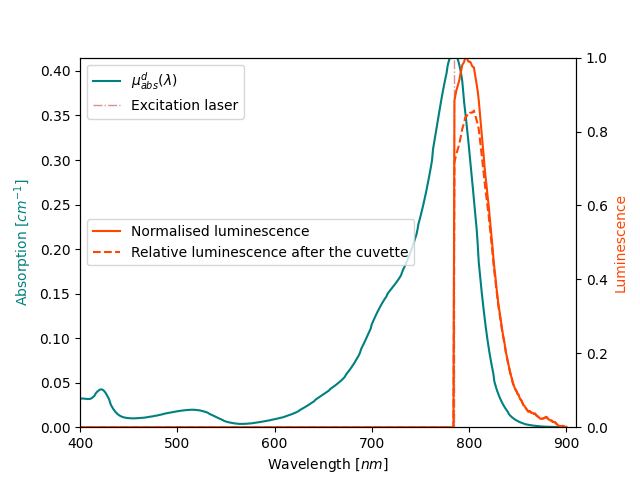

In [29]:
fig,ax = pl.subplots()

ax.plot(data.wavelength, data['mu_a'], label='$\mu_{abs}^d(\lambda)$', color='teal')
ax.plot([785, 785], [-1, 1], '-.', lw=1, alpha=0.5, color='firebrick', label='Excitation laser')
ax.set_ylabel('Absorption $[cm^{-1}]$', color='teal')
ax.set_xlabel('Wavelength $[nm]$')
ax.set_ylim([0, 0.415])
ax.legend(loc=0)

ax2 = ax.twinx()

ax2.plot(data.wavelength, data['emission_norm'] / data['emission_norm'].max(), label='Normalised luminescence', color='orangered')
# pl.plot(data.wavelength, data['mu_a'])
pl.plot(data.wavelength, data['relative_lumn'] / data['emission_norm'].max(), '--', label='Relative luminescence after the cuvette', color='orangered')

ax2.set_ylim([0, 1])
ax.set_xlim([400, 910])
ax2.set_ylabel('Luminescence', color='orangered')


ax2.legend(loc=6)


In [36]:
fig.savefig('../plots/Dye_reabsorption.png')

In [30]:
1 - data.relative_lumn.sum()

0.10544372366093302

In [31]:
data.emission_norm.sum()

1.0

In [32]:
data.relative_lumn.sum()

0.894556276339067